<a href="https://colab.research.google.com/github/md-abu-shayid/Brain_Tumor_Detection_CNN/blob/main/Brain_Tumour_Detection_(7023_MRI_Scan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import normalize
from keras.models import Model, Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D
from keras.utils import to_categorical

In [2]:
!pip3 install opendatasets
!pip3 install pandas

In [3]:
import opendatasets as od
import pandas

In [4]:
od.download(
    "https://www.kaggle.com/datasets/abushayid/brain-tumor-7023-mri-scan/data")

Skipping, found downloaded files in "./brain-tumor-7023-mri-scan" (use force=True to force download)


In [4]:
X_train = []
Y_train = []
labels = ['pituitary','healthy','meningioma','glioma']
image_size = 224

In [5]:
for i in labels:
    folderPath = os.path.join('/content/brain-tumor-7023-mri-scan',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [6]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape #shape is not a function thatswhy no parenthesis()

(7023, 224, 224, 3)

In [8]:
X_train, X_test, Y_train, Y_test=train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [9]:
Y_train_new = [] # y_train_new and y_test_new are initialized as empty lists to store the encoded labels
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [10]:
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", Y_train.shape)
print("Y_Test Shape:", Y_test.shape)


X_Train Shape: (5618, 224, 224, 3)
X_Test Shape: (1405, 224, 224, 3)
Y_Train Shape: (5618, 4)
Y_Test Shape: (1405, 4)


In [11]:
model_cnn=Sequential()

model_cnn.add(Conv2D(32, (3,3), input_shape=(image_size, image_size, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


model_cnn.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(128))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(64))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(4))
model_cnn.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,575,076 (21.27 MB)

 Trainable params: 5,575,076 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history=model_cnn.fit(
    X_train, Y_train,
    batch_size=16,
    verbose=1,
    epochs=13,
    validation_data=(X_test, Y_test),
    shuffle=False
)

Epoch 1/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.4374 - loss: 32.5317 - val_accuracy: 0.8185 - val_loss: 0.5802
Epoch 2/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7401 - loss: 0.7095 - val_accuracy: 0.8448 - val_loss: 0.4220
Epoch 3/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8133 - loss: 0.5242 - val_accuracy: 0.8662 - val_loss: 0.3665
Epoch 4/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8467 - loss: 0.4292 - val_accuracy: 0.8811 - val_loss: 0.3480
Epoch 5/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8771 - loss: 0.3617 - val_accuracy: 0.9025 - val_loss: 0.2975
Epoch 6/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9075 - loss: 0.2790 - val_accuracy: 0.9096 - val_loss: 0.3035
Epoch 7/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9135 - loss: 0.2489 - val_accuracy: 0.9117 - val_loss: 0.2874
Epoch 8/13
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9306 - loss: 0.2025 - val

In [16]:
model_cnn.save('CNN_model.keras')

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16



base_model_vgg16 = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (image_size, image_size, 3)
)

base_model_vgg16.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
from tensorflow.keras import layers, models
from keras import regularizers


vgg16_modified = models.Sequential(
    [
    base_model_vgg16,
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(4, activation = 'softmax')
    ]
)

In [19]:
vgg16_modified.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,724,996 (105.76 MB)

 Trainable params: 13,010,308 (49.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
vgg16_modified.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [21]:
history_vgg16_modified = vgg16_modified.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=16,
    #validation_steps = 16,
    epochs= 12,
    verbose = 1
)

Epoch 1/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.6896 - loss: 8.6341 - val_accuracy: 0.8591 - val_loss: 1.6323
Epoch 2/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.8677 - loss: 1.6158 - val_accuracy: 0.9167 - val_loss: 1.1138
Epoch 3/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.9178 - loss: 1.1214 - val_accuracy: 0.9423 - val_loss: 0.9296
Epoch 4/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9471 - loss: 0.8816 - val_accuracy: 0.9495 - val_loss: 0.8304
Epoch 5/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.9539 - loss: 0.7344 - val_accuracy: 0.9587 - val_loss: 0.7150
Epoch 6/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.9617 - loss: 0.6241 - val_accuracy: 0.9488 - val_loss: 0.6551
Epoch 7/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9696 - loss: 0.5273 - val_accuracy: 0.9431 - val_loss: 0.5742
Epoch 8/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - accuracy: 0.9652 - loss: 0.4769 -

In [29]:
vgg16_modified.save('vgg16_modified.keras')

In [23]:
from keras.applications.inception_v3 import InceptionV3



base_model_inception_v3 = InceptionV3(
    weights = 'imagenet',
    include_top = False,
    input_shape = (image_size, image_size, 3)
)

base_model_inception_v3.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
model_inception_v3_modified = models.Sequential(
    [
    base_model_inception_v3,
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(4, activation = 'softmax')
    ]
)

In [26]:
model_inception_v3_modified.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1024)                │      52,429,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,823,588 (285.43 MB)

 Trainable params: 53,020,804 (202.26 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [27]:
model_inception_v3_modified.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
history_inception_v3_modified = model_inception_v3_modified.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=16,
    #validation_steps = 16,
    epochs= 12,
    verbose = 1
)

Epoch 1/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 66s 133ms/step - accuracy: 0.4779 - loss: 66.9560 - val_accuracy: 0.5843 - val_loss: 2.4622
Epoch 2/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.5505 - loss: 2.6508 - val_accuracy: 0.6363 - val_loss: 2.2989
Epoch 3/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.6866 - loss: 2.1939 - val_accuracy: 0.6740 - val_loss: 2.0309
Epoch 4/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.7145 - loss: 1.9173 - val_accuracy: 0.7310 - val_loss: 1.7407
Epoch 5/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.7299 - loss: 1.7165 - val_accuracy: 0.7488 - val_loss: 1.5463
Epoch 6/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7436 - loss: 1.5915 - val_accuracy: 0.7544 - val_loss: 1.4536
Epoch 7/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.7461 - loss: 1.4771 - val_accuracy: 0.7310 - val_loss: 1.3630
Epoch 8/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.7367 - loss: 1.3348 

In [30]:
model_inception_v3_modified.save('inception_v3_modified.keras')

In [31]:
from keras.applications.xception import Xception


base_model_Xception = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (image_size, image_size, 3)
)

base_model_Xception.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
model_xception_modified = models.Sequential(
    [
    base_model_Xception,
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(4, activation = 'softmax')
    ]
)

In [34]:
model_xception_modified.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,213,932 (473.84 MB)

 Trainable params: 103,352,452 (394.26 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [35]:
model_xception_modified.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [36]:
history_xception_modified = model_xception_modified.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    batch_size=16,
    #validation_steps = 16,
    epochs= 12,
    verbose = 1
)

Epoch 1/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 60s 132ms/step - accuracy: 0.5108 - loss: 25.7063 - val_accuracy: 0.7509 - val_loss: 2.0233
Epoch 2/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 90ms/step - accuracy: 0.7550 - loss: 2.1453 - val_accuracy: 0.8221 - val_loss: 1.6995
Epoch 3/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.8399 - loss: 1.5486 - val_accuracy: 0.8754 - val_loss: 1.3313
Epoch 4/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 32s 90ms/step - accuracy: 0.8897 - loss: 1.2190 - val_accuracy: 0.8804 - val_loss: 1.1638
Epoch 5/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9128 - loss: 1.0396 - val_accuracy: 0.8940 - val_loss: 1.0198
Epoch 6/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.9281 - loss: 0.8875 - val_accuracy: 0.9039 - val_loss: 0.9153
Epoch 7/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.9382 - loss: 0.8005 - val_accuracy: 0.8868 - val_loss: 0.9964
Epoch 8/12
352/352 ━━━━━━━━━━━━━━━━━━━━ 31s 89ms/step - accuracy: 0.9360 - loss: 0.7095

In [37]:
model_xception_modified.save('xception_modified.keras')

In [38]:
!pip install seaborn

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

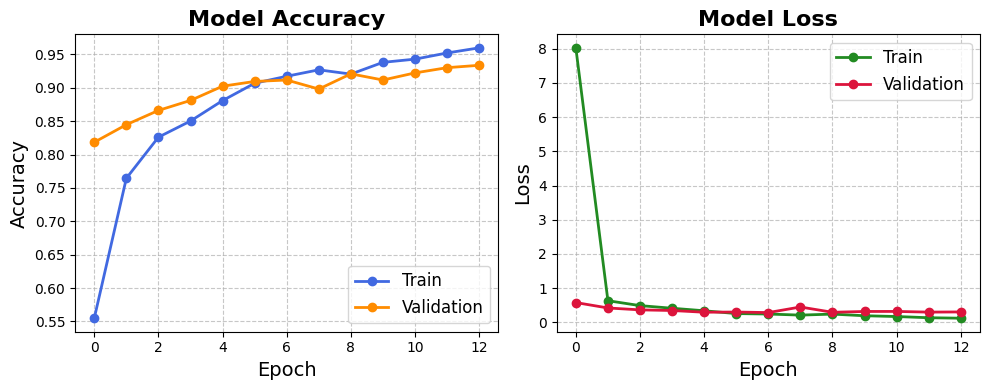

In [44]:
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='royalblue', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], color='darkorange', linewidth=2, marker='o')
plt.title('Model Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(['Train', 'Validation'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='forestgreen', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], color='crimson', linewidth=2, marker='o')
plt.title('Model Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(['Train', 'Validation'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

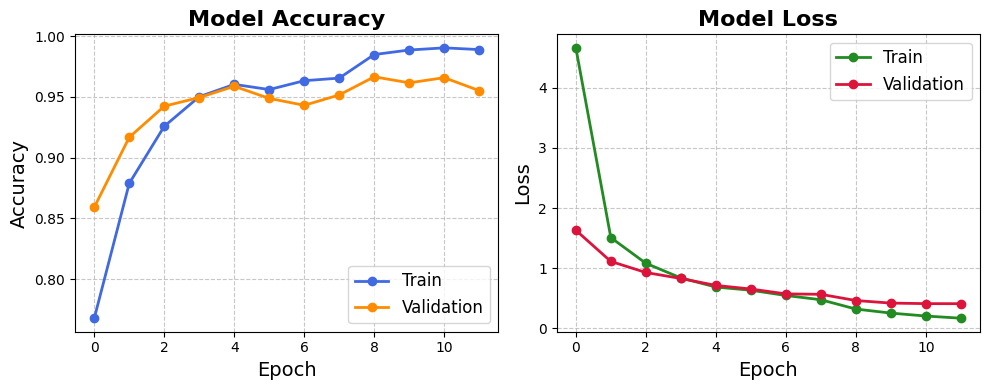

In [43]:
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_vgg16_modified.history['accuracy'], color='royalblue', linewidth=2, marker='o')
plt.plot(history_vgg16_modified.history['val_accuracy'], color='darkorange', linewidth=2, marker='o')
plt.title('Model Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(['Train', 'Validation'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_vgg16_modified.history['loss'], color='forestgreen', linewidth=2, marker='o')
plt.plot(history_vgg16_modified.history['val_loss'], color='crimson', linewidth=2, marker='o')
plt.title('Model Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(['Train', 'Validation'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

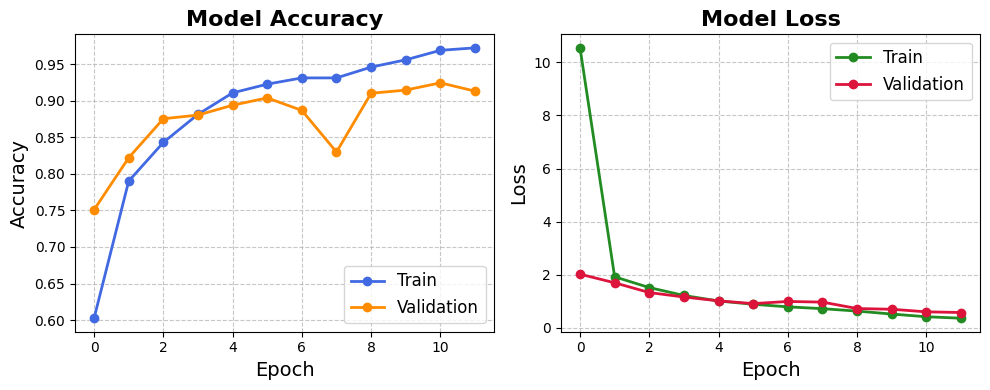

In [42]:
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_xception_modified.history['accuracy'], color='royalblue', linewidth=2, marker='o')
plt.plot(history_xception_modified.history['val_accuracy'], color='darkorange', linewidth=2, marker='o')
plt.title('Model Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(['Train', 'Validation'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_xception_modified.history['loss'], color='forestgreen', linewidth=2, marker='o')
plt.plot(history_xception_modified.history['val_loss'], color='crimson', linewidth=2, marker='o')
plt.title('Model Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(['Train', 'Validation'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 423ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 351ms/step


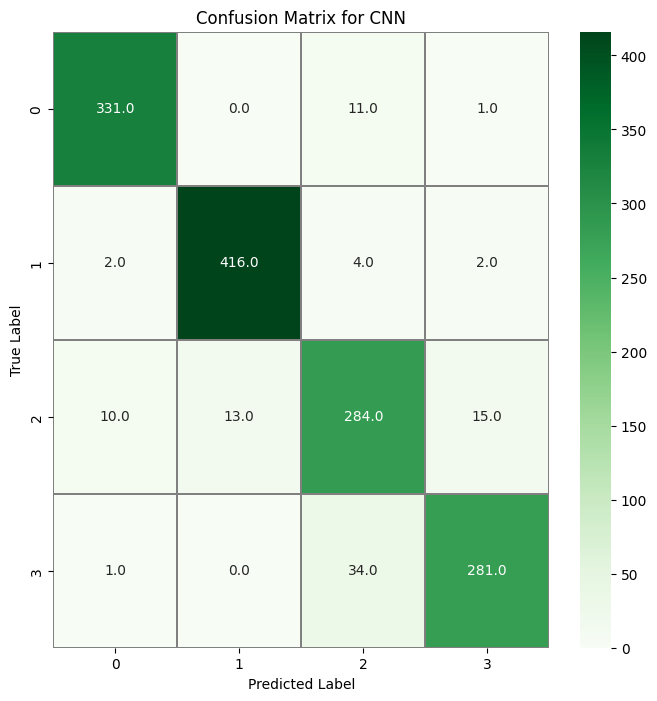

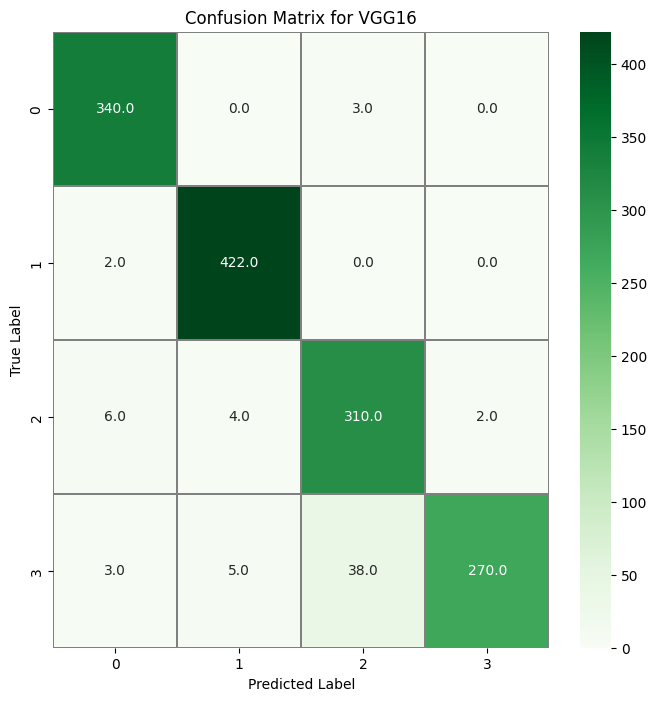

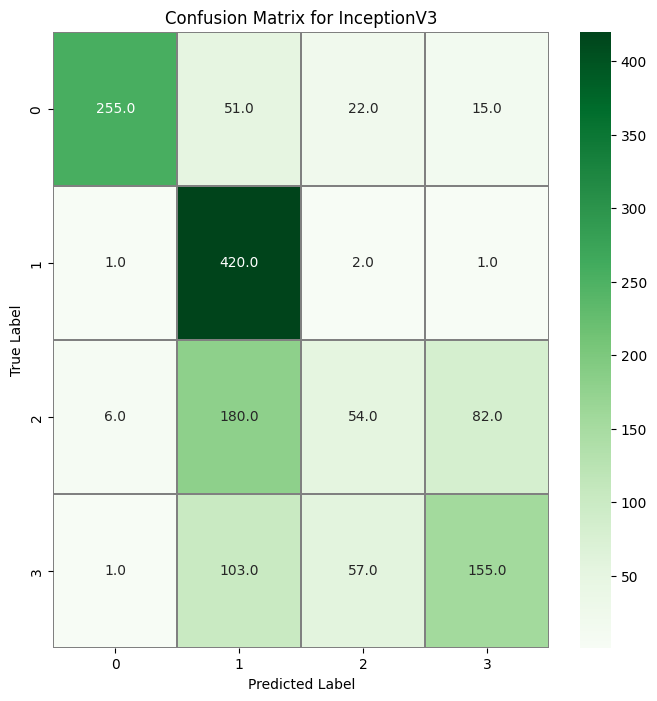

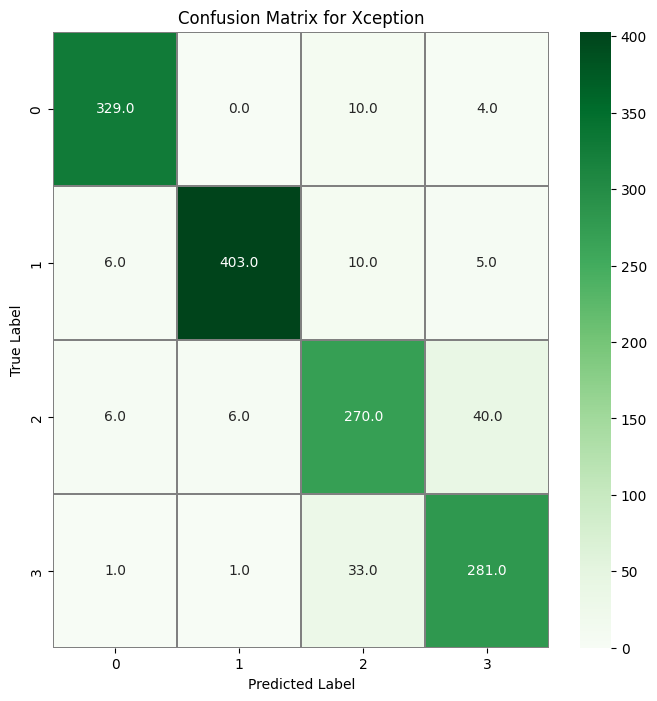

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred_cnn = model_cnn.predict(X_test)
Y_pred_vgg16 = vgg16_modified.predict(X_test)
Y_pred_inceptionv3 = model_inception_v3_modified.predict(X_test)
Y_pred_xception = model_xception_modified.predict(X_test)


# Convert predictions classes to one hot vectors
Y_pred_cnn_classes = np.argmax(Y_pred_cnn,axis = 1)
Y_pred_vgg16_classes = np.argmax(Y_pred_vgg16,axis = 1)
Y_pred_inceptionv3_classes = np.argmax(Y_pred_inceptionv3,axis = 1)
Y_pred_xception_classes = np.argmax(Y_pred_xception,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1)

# compute the confusion matrix
confusion_mtx_cnn = confusion_matrix(Y_true, Y_pred_cnn_classes)
confusion_mtx_vgg16 = confusion_matrix(Y_true, Y_pred_vgg16_classes)
confusion_mtx_inceptionv3 = confusion_matrix(Y_true, Y_pred_inceptionv3_classes)
confusion_mtx_xception = confusion_matrix(Y_true, Y_pred_xception_classes)

# plot the confusion matrix for CNN model
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_cnn, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN")
plt.show()

# plot the confusion matrix for VGG16 model
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_vgg16, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG16")
plt.show()

# plot the confusion matrix for InceptionV3 model
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_inceptionv3, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for InceptionV3")
plt.show()

# plot the confusion matrix for InceptionV3 model
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_xception, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Xception")
plt.show()

In [47]:
def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

## Metrics for CNN

In [48]:
calculate_metrics(confusion_matrix = confusion_mtx_cnn, categories = labels)

Class: Pituitary
Precision: 0.962
Recall: 0.965
F1-Score: 0.964

Class: Healthy
Precision: 0.970
Recall: 0.981
F1-Score: 0.975

Class: Meningioma
Precision: 0.853
Recall: 0.882
F1-Score: 0.867

Class: Glioma
Precision: 0.940
Recall: 0.889
F1-Score: 0.914


Accuracy: 0.934


## Metrics for VGG16

In [50]:
calculate_metrics(confusion_matrix = confusion_mtx_vgg16, categories = labels)

Class: Pituitary
Precision: 0.969
Recall: 0.991
F1-Score: 0.980

Class: Healthy
Precision: 0.979
Recall: 0.995
F1-Score: 0.987

Class: Meningioma
Precision: 0.883
Recall: 0.963
F1-Score: 0.921

Class: Glioma
Precision: 0.993
Recall: 0.854
F1-Score: 0.918


Accuracy: 0.955


## Metrics for InceptionV3

In [52]:
calculate_metrics(confusion_matrix = confusion_mtx_inceptionv3, categories = labels)

Class: Pituitary
Precision: 0.970
Recall: 0.743
F1-Score: 0.842

Class: Healthy
Precision: 0.557
Recall: 0.991
F1-Score: 0.713

Class: Meningioma
Precision: 0.400
Recall: 0.168
F1-Score: 0.236

Class: Glioma
Precision: 0.613
Recall: 0.491
F1-Score: 0.545


Accuracy: 0.629


## Classification Report of CNN Model

In [53]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_cnn_classes))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       343
           1       0.97      0.98      0.98       424
           2       0.85      0.88      0.87       322
           3       0.94      0.89      0.91       316

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.93      0.93      0.93      1405



## Classification Report of VGG16 Model

In [54]:
print(classification_report(Y_true, Y_pred_vgg16_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       343
           1       0.98      1.00      0.99       424
           2       0.88      0.96      0.92       322
           3       0.99      0.85      0.92       316

    accuracy                           0.96      1405
   macro avg       0.96      0.95      0.95      1405
weighted avg       0.96      0.96      0.95      1405



## Classification Report of InceptionV3 Model

In [55]:
print(classification_report(Y_true, Y_pred_inceptionv3_classes))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       343
           1       0.56      0.99      0.71       424
           2       0.40      0.17      0.24       322
           3       0.61      0.49      0.54       316

    accuracy                           0.63      1405
   macro avg       0.63      0.60      0.58      1405
weighted avg       0.63      0.63      0.60      1405



## Classification Report of Xception Model

In [56]:
print(classification_report(Y_true, Y_pred_xception_classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       343
           1       0.98      0.95      0.97       424
           2       0.84      0.84      0.84       322
           3       0.85      0.89      0.87       316

    accuracy                           0.91      1405
   macro avg       0.91      0.91      0.91      1405
weighted avg       0.91      0.91      0.91      1405



# Average/Sum Ensemble

In [58]:
from keras.models import load_model
from sklearn.metrics import accuracy_score
#model_path = CNN_model
model1 = load_model('CNN_model.keras')
model2 = load_model('vgg16_modified.keras')
model3 = load_model('inception_v3_modified.keras')
model4 = load_model('xception_modified.keras')

models = [model1, model2, model3, model4]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(X_test)
Pred_classes_1 = np.argmax(prediction1,axis=1)

prediction2 = model2.predict(X_test)
Pred_classes_2 = np.argmax(prediction2,axis=1)

prediction3 = model3.predict(X_test)
Pred_classes_3 = np.argmax(prediction3,axis=1)

prediction4 = model4.predict(X_test)
Pred_classes_4 = np.argmax(prediction4,axis=1)

accuracy1 = accuracy_score(Y_true, Pred_classes_1)
accuracy2 = accuracy_score(Y_true, Pred_classes_2)
accuracy3 = accuracy_score(Y_true, Pred_classes_3)
accuracy4 = accuracy_score(Y_true, Pred_classes_4)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for model4 = ', accuracy4)

ensemble_accuracy = accuracy_score(Y_true, ensemble_prediction)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step
Accuracy Score for model1 =  0.9338078291814946
Accuracy Score for model2 =  0.9551601423487545
Accuracy Score for model3 =  0.6291814946619217
Accuracy Score for model4 =  0.9131672597864768
Accuracy Score for average ensemble =  0.9686832740213523


# Weighted Average Ensemble

In [59]:
weights = [0.5, 0.4, 0.3, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(Y_true, weighted_ensemble_prediction)

In [60]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for model4 = ', accuracy4)
print('Accuracy Score for average ensemble = ', ensemble_accuracy*100)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy*100)

Accuracy Score for model1 =  0.9338078291814946
Accuracy Score for model2 =  0.9551601423487545
Accuracy Score for model3 =  0.6291814946619217
Accuracy Score for model4 =  0.9131672597864768
Accuracy Score for average ensemble =  96.86832740213524
Accuracy Score for weighted average ensemble =  96.44128113879003


# Grid search for the best combination of w1, w2, w3 and w4 that gives maximum acuracy

In [61]:
models = [model1, model2, model3, model4]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)


import pandas as pd

df = pd.DataFrame([])

for w1 in range(0, 9):
    for w2 in range(0, 9):
        for w3 in range(0, 9):
            for w4 in range(0, 9):
                wts = [w1/10., w2/10., w3/10. ,w4/10.]
                wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
                wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
                weighted_accuracy = accuracy_score(Y_true, wted_ensemble_pred)
                df = pd.concat([df, pd.DataFrame.from_records([{'wt1':wts[0], 'wt2':wts[1], 'wt3':wts[2], 'wt4':wts[3],
                             'acc':weighted_accuracy*100}],index=[0])], ignore_index=True)


max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[4],
      "obained with w1 = ", max_acc_row[0],
      ", w2 = ", max_acc_row[1],
      ", w3 = ", max_acc_row[2], "and w4 = ", max_acc_row[3])

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step
Max accuracy of  97.43772241992883 obained with w1 =  0.1 , w2 =  0.5 , w3 =  0.0 and w4 =  0.5


<ipython-input-61-ef544d8c816e>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Max accuracy of ", max_acc_row[4],
<ipython-input-61-ef544d8c816e>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "obained with w1 = ", max_acc_row[0],
<ipython-input-61-ef544d8c816e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ", w2 = ", max_acc_row[1],
<ipython-input-61-ef544d8c816e>:26: FutureWarning: Series.__getitem__ treating keys

# Explore metrics for the ideal weighted ensemble model

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step
Predicted Label:  pituitary
True Label:  pituitary


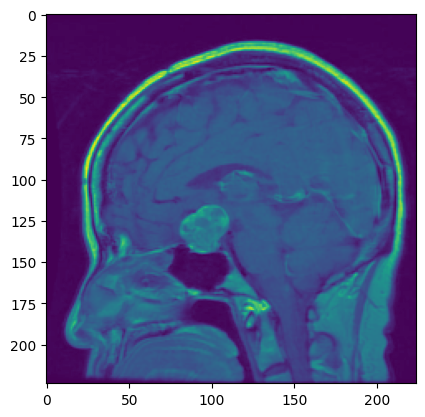

In [63]:
import random

models = [model1, model2, model3, model4]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)

ideal_weights = [0.1, 0.5, 0.0, 0.5] # Ideal weights

# Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(Y_true, ideal_weighted_ensemble_prediction)

i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(X_test[i,:,:,0])
print("Predicted Label: ", labels[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", labels[int(Y_true[i])])

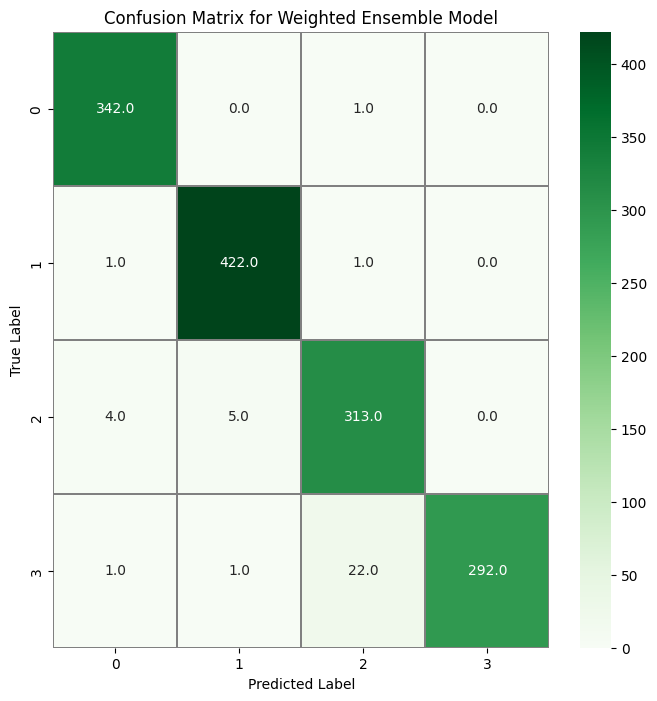

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Print confusion matrix
cm = confusion_matrix(Y_true, ideal_weighted_ensemble_prediction)

# plot the confusion matrix for CNN model
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Weighted Ensemble Model")
plt.show()

([<matplotlib.axis.XTick at 0x7f5708c04910>,
 [Text(0, 0, 'pituitary'),
  Text(1, 0, 'healthy'),
  Text(2, 0, 'meningioma'),
  Text(3, 0, 'glioma')])

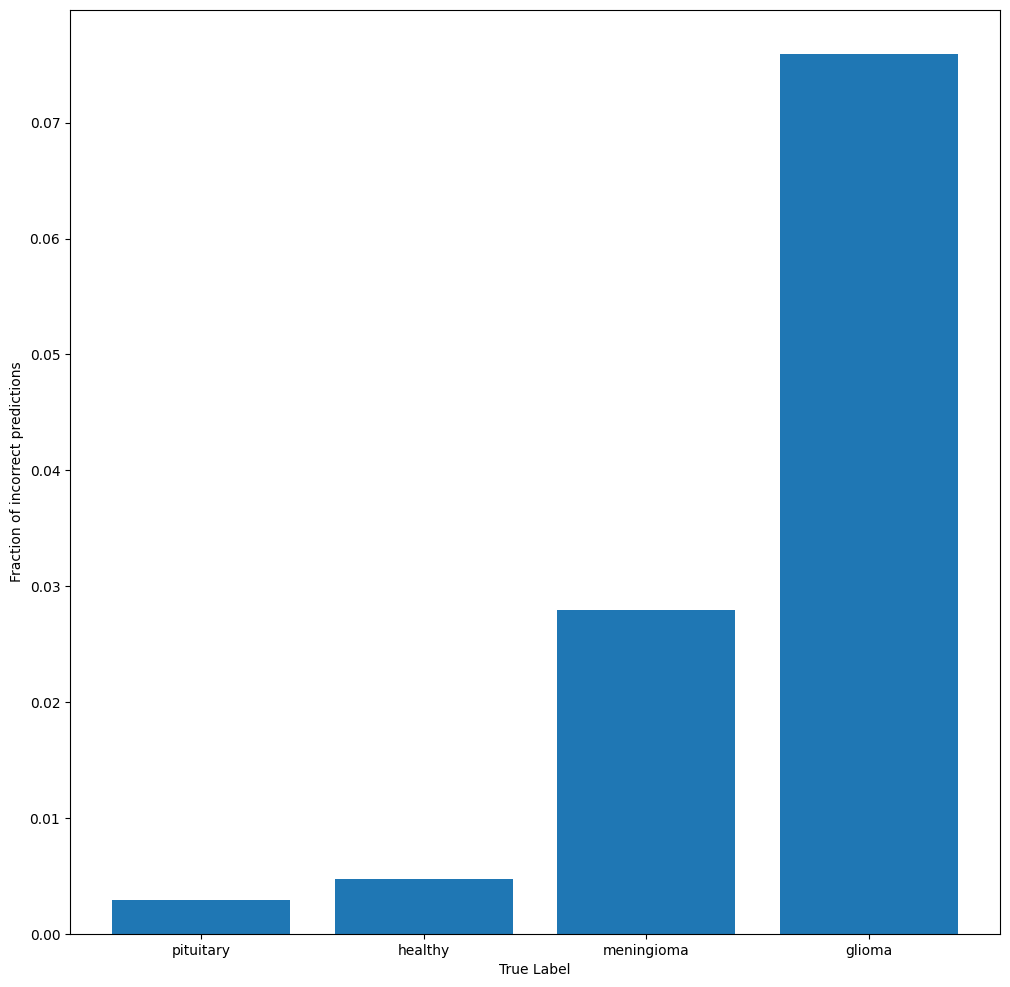

In [67]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(4), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(4), labels)